<a href="https://colab.research.google.com/github/ricardogalindoestevez-arch/prueba/blob/main/Copia_de_06_10_4_APPLE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¡Perfecto\! Usar **Google Colab** es una excelente idea, ya que elimina la necesidad de que los alumnos instalen software y les permite colaborar y compartir notebooks fácilmente. 💻 Para que practiquen más, he diseñado un plan de análisis de datos con más pasos, usando el mismo conjunto de datos de precios de acciones de **Apple (AAPL)**.

Este plan guía a los alumnos a través de un **proceso de análisis de datos** más completo, desde la adquisición hasta la interpretación.

-----

### **Paso 1: Configuración del Entorno y Carga de Datos**

En este primer paso, los alumnos aprenderán a instalar bibliotecas necesarias en un entorno de Colab y a cargar datos financieros de una fuente pública.

1.  **Instalar la biblioteca `yfinance`:** Colab no la trae por defecto. Esto les enseña a usar el comando `pip` en un notebook.

In [ ]:
!pip install yfinance

2.  **Importar las bibliotecas:** Es una buena práctica agrupar las importaciones al principio.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

3.  **Descargar los datos:** Usarán `yfinance` para obtener el historial de precios de Apple. Pueden modificar el rango de fechas para ver cómo cambia el conjunto de datos.

In [ ]:
ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True) # Use auto_adjust=True
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume'] # Manually assign column names
df['Daily_Return'] = df['Close'].pct_change() # Calculate Daily_Return here
print("Datos cargados. Echa un vistazo a las primeras filas:")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Datos cargados. Echa un vistazo a las primeras filas:
                  Open        High         Low       Close     Volume  \
Date                                                                    
2022-01-03  178.443130  179.296091  174.227410  174.345053  104487900   
2022-01-04  176.178375  179.354886  175.609740  179.050963   99310400   
2022-01-05  171.492050  176.639165  171.217539  176.090142   94537600   
2022-01-06  168.629303  171.864636  168.276357  169.315582   96904000   
2022-01-07  168.795975  170.727370  167.678316  169.501866   86709100   

            Daily_Return  
Date                      
2022-01-03           NaN  
2022-01-04      0.026992  
2022-01-05     -0.016536  
2022-01-06     -0.038472  
2022-01-07      0.001100  


-----

### **Paso 2: Exploración y Limpieza de Datos**

Aquí, el objetivo es que los alumnos se familiaricen con los datos y busquen posibles problemas.

1.  **Explorar la estructura del DataFrame:** Usarán `df.info()` para ver los tipos de datos y si hay valores nulos.

In [ ]:
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (High, AAPL)    251 non-null    float64
 2   (Low, AAPL)     251 non-null    float64
 3   (Open, AAPL)    251 non-null    float64
 4   (Volume, AAPL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


2.  **Verificar valores atípicos (outliers):** Les pedirás que examinen la columna `Volume` (volumen de transacciones), ya que a veces puede tener picos inusuales.

      * **Pregunta de práctica:** "Usa `df.describe()` para obtener un resumen estadístico de la columna `Volume`. ¿Observas algún valor máximo que te parezca muy elevado?"

    <!-- end list -->

In [ ]:
print("\nResumen estadístico del volumen:")
print(df['Volume'].describe())


Resumen estadístico del volumen:
Ticker          AAPL
count   2.510000e+02
mean    8.791038e+07
std     2.365699e+07
min     3.519590e+07
25%     7.229740e+07
50%     8.373720e+07
75%     9.693705e+07
max     1.826020e+08


-----

### **Paso 3: Análisis y Manipulación de Datos**

Este es el corazón del ejercicio. Los alumnos harán cálculos y transformaciones para extraer información valiosa.

1.  **Crear una nueva columna para el retorno diario:** Esta es una métrica clave en finanzas.

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
print("\nDataFrame con la nueva columna 'Daily_Return':")
print(df.head())


DataFrame con la nueva columna 'Daily_Return':
Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2022-01-03  178.443130  179.296091  174.227410  174.345053  104487900   
2022-01-04  176.178375  179.354886  175.609740  179.050963   99310400   
2022-01-05  171.492050  176.639165  171.217539  176.090142   94537600   
2022-01-06  168.629303  171.864636  168.276357  169.315582   96904000   
2022-01-07  168.795975  170.727370  167.678316  169.501866   86709100   

Price      Daily_Return  
Ticker                   
Date                     
2022-01-03          NaN  
2022-01-04    -0.012692  
2022-01-05    -0.026600  
2022-01-06    -0.016693  
2022-01-07     0.000988  


2.  **Calcular medias móviles (Moving Averages):** Una herramienta fundamental en el análisis técnico. Les pedirás que calculen una media móvil de 20 días. Esto les enseña a usar funciones de ventana.

In [ ]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
print("\nDataFrame con la media móvil de 20 días:")
print(df.tail())


DataFrame con la media móvil de 20 días:
Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2022-12-23  130.026215  130.578424  127.837087  129.099285  63814900   
2022-12-27  128.221664  129.582478  126.929885  129.552896  69007800   
2022-12-28  124.287155  129.207757  124.119521  127.866670  85438400   
2022-12-29  127.807503  128.665399  125.953651  126.210030  75703700   
2022-12-30  128.123062  128.142788  125.657837  126.624212  77034200   

Price      Daily_Return       MA_20  
Ticker                               
Date                                 
2022-12-23    -0.002798  138.704819  
2022-12-27    -0.013878  138.005186  
2022-12-28    -0.030685  137.259207  
2022-12-29     0.028324  136.351016  
2022-12-30     0.002469  135.444796  


3.  **Filtrar el DataFrame:** Les pedirás que encuentren los días en los que el precio de cierre fue superior a su media móvil de 20 días.

In [ ]:
df['MA_20'] = df['Close'].rolling(window=20).mean() # Calculate MA_20 in this cell
dias_alcistas = df[df['Close'] > df['MA_20']]
print("\nDías donde el precio de cierre superó la media móvil de 20 días:")
print(dias_alcistas.head())


Días donde el precio de cierre superó la media móvil de 20 días:
                  Open        High         Low       Close    Volume  \
Date                                                                   
2022-02-01  171.188126  171.413614  168.933196  170.599878  86213900   
2022-02-02  172.394043  172.433267  169.933237  171.325407  84914300   
2022-02-03  169.511658  172.786215  168.746945  171.060696  89418100   
2022-02-04  169.226959  170.905590  167.548328  168.529980  82465400   
2022-02-07  168.510361  170.758337  167.813381  169.688340  77251200   

                 MA_20  
Date                    
2022-02-01  166.678783  
2022-02-02  166.292506  
2022-02-03  166.041033  
2022-02-04  166.001753  
2022-02-07  166.011077  


-----

### **Paso 4: Visualización de Datos**

La visualización es crucial para comunicar los resultados del análisis.

1.  **Graficar el precio de cierre y la media móvil:** Esto les permitirá ver visualmente la relación entre ambos.

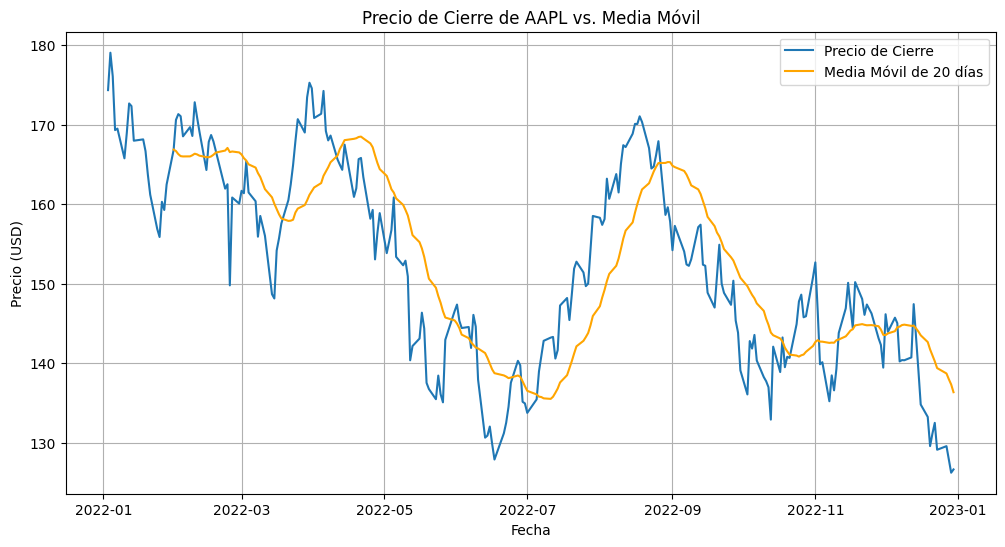

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Precio de Cierre')
plt.plot(df.index, df['MA_20'], label='Media Móvil de 20 días', color='orange')
plt.title('Precio de Cierre de AAPL vs. Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

2.  **Visualizar la distribución de los retornos diarios:** Les ayudará a entender el riesgo y la volatilidad.

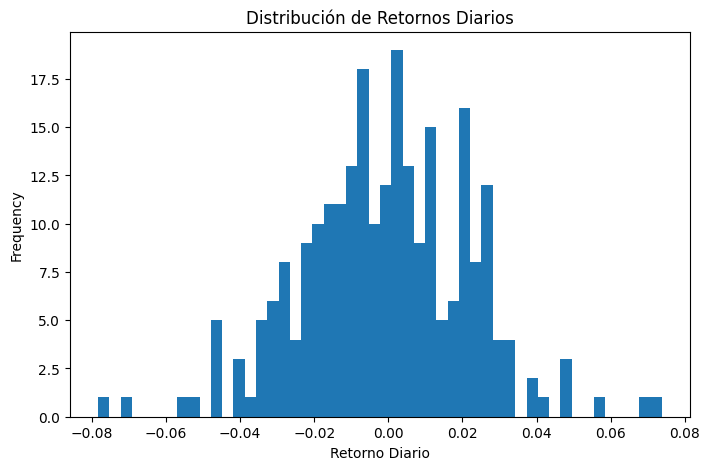

In [ ]:
plt.figure(figsize=(8, 5))
df['Daily_Return'].plot(kind='hist', bins=50, title='Distribución de Retornos Diarios')
plt.xlabel('Retorno Diario')
plt.show()

-----

### **Paso 5: Conclusiones y Análisis**

Finalmente, los alumnos deberán interpretar los resultados obtenidos.

  * **Pregunta de práctica:** "¿Qué puedes concluir del gráfico de precios y la media móvil? ¿Cuándo consideras que fue un buen momento para comprar o vender según esta estrategia?"
  * **Pregunta de práctica:** "Observando el histograma de retornos, ¿los retornos son simétricos o hay más días con retornos negativos o positivos? ¿Qué te dice esto sobre el riesgo de la acción?"

Este enfoque más detallado en Google Colab permite a los alumnos no solo escribir código, sino también **pensar como analistas de datos**, siguiendo un flujo de trabajo lógico y extrayendo conclusiones significativas de la información.